In [169]:
# Native packages
from math import radians, degrees, sin, cos, asin, acos, sqrt
import datetime
import time
import sys
import os
from pathlib import Path 
import glob
            
import warnings

# Third-party packages for data manipulation
import numpy as np
import pandas as pd
import xarray as xr

import dateutil.parser

# Third-party packages for data interpolation
from scipy import interpolate
# Third-party packages for data visualizations
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

['/Users/kdrushka/data/sassie/insitu/data/Swift09.csv',
 '/Users/kdrushka/data/sassie/insitu/data/Swift12.csv',
 '/Users/kdrushka/data/sassie/insitu/data/Swift13.csv',
 '/Users/kdrushka/data/sassie/insitu/data/Swift15.csv',
 '/Users/kdrushka/data/sassie/insitu/data/Swift16.csv',
 '/Users/kdrushka/data/sassie/insitu/data/Swift17.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2019-02.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-01.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-02.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-03.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-04.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-05.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-06.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-07.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-08.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-09.csv',
 '/Users/kdrushka/data/sassie/insitu/data/UTO_2022-10.csv',
 '/U

/Users/kdrushka/data/sassie/insitu/data/Swift09.csv
/Users/kdrushka/data/sassie/insitu/data/Swift12.csv
/Users/kdrushka/data/sassie/insitu/data/Swift13.csv
/Users/kdrushka/data/sassie/insitu/data/Swift15.csv
/Users/kdrushka/data/sassie/insitu/data/Swift16.csv
/Users/kdrushka/data/sassie/insitu/data/Swift17.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2019-02.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-01.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-02.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-03.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-04.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-05.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-06.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-07.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-08.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-09.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-10.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2022-11.csv


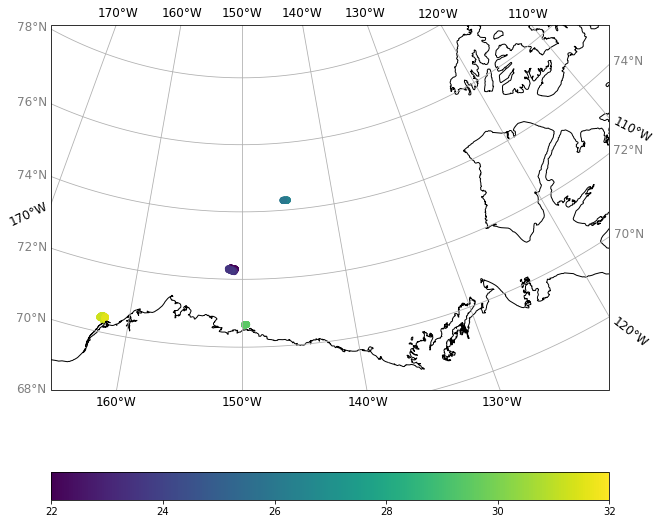

In [196]:
%matplotlib inline
datadir = '/Users/kdrushka/data/sassie/insitu/data/'
prefixes = ('Sw*', 'UTO*')
files = []
for pre in prefixes:
    files.extend(glob.glob(datadir + pre + '*[0-9].csv'))
files


# set up map 
# domain
blonmin = -165
blonmax = -120
blatmin = 68
blatmax = 78
lonmapmin = blonmin
lonmapmax = blonmax
latmapmin = blatmin
latmapmax = blatmax
lon0 = -150

fig = plt.figure(figsize=(10,10))
nrows=1
ncols=2
map_proj = ccrs.NorthPolarStereo(central_longitude=lon0)
crs = ccrs.PlateCarree()


ax = fig.add_subplot(1,1,1, projection=map_proj)
ax.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=cartopy.crs.PlateCarree()) 
ax.coastlines()
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.xformatter = LONGITUDE_FORMATTER
gl.xlabel_style = {'size': 12, 'color': 'k','rotation':0}
gl.yformatter = LATITUDE_FORMATTER
gl.ylabel_style = {'size': 12, 'color': 'gray','rotation':0}

        
i = 0
for file in files:
    i+=1
    print(file)
    df = pd.read_csv(file)
    # df = pd.read_csv(file, header=None, names=['Date', 'Lat', 'Lon', 'Temperature', 'Salinity'])
    # get rid of data out of the domain
    df = df[df.Lat > blatmin]
    df = df[df.Lat < blatmax]
    df = df[df.Lon > blonmin]
    df = df[df.Lon < blonmax]
    # df = df[df.Date > "2022-01-01"]
    
    # df[df.Date > dateutil.parser.parse("2022-01-04")]

    # map SSS

    pp = ax.scatter(df['Lon'], df['Lat'], c=df['Salinity'],
              transform=ccrs.PlateCarree(),
                   vmin=22, vmax=32)
    # pp = ax.scatter(df['Lon'], df['Lat'], c=df['Temperature'],
    #           transform=ccrs.PlateCarree())
h=plt.colorbar(pp, orientation='horizontal', ax=ax)

# # filename = filename[0]
# # print(filename)


# df = pd.read_excel(filename)
      

In [193]:
df = pd.read_csv(file)
df
# file

,Date,Lat,Lon,Temperature,Salinity
0,2019-12-09 17:23:15.000001,51.452602,-154.191238,8.970602,NaN
1,2019-12-09 17:37:48.999998,51.448868,-154.194550,6.669214,NaN
2,2019-12-09 17:47:27.000001,51.445110,-154.201447,6.160284,NaN
3,2019-12-09 17:58:08.999999,51.442379,-154.206955,5.721097,NaN
4,2019-12-09 18:10:21.999996,51.442478,-154.205704,8.370014,32.277054
...,...,...,...,...,...
3319,2021-09-26 13:11:47.999999,71.546440,1.421214,6.150729,NaN
3320,2021-09-26 13:22:57.000001,71.532646,1.445633,6.174518,NaN
3321,2021-09-26 13:38:50.000002,71.518906,1.469766,6.250462,NaN
3322,2021-09-26 13:46:56.000001,71.505615,1.492337,6.157787,NaN


In [172]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: Union[ForwardRef('PathLike[str]'), str, IO[~T], io.RawIOBase, io.BufferedIOBase, io.TextIOBase, _io.TextIOWrapper, mmap.mmap],
    sep=<object object at 0x10c3f1e80>,
    delimiter=None,
    header='infer',
    names=None,
    index_col=None,
    usecols=None,
    squeeze=False,
    prefix=None,
    mangle_dupe_cols=True,
    dtype=None,
    engine=None,
    converters=None,
    true_values=None,
    false_values=None,
    skipinitialspace=False,
    skiprows=None,
    skipfooter=0,
    nrows=None,
    na_values=None,
    keep_default_na=True,
    na_filter=True,
    verbose=False,
    skip_blank_lines=True,
    parse_dates=False,
    infer_datetime_format=False,
    keep_date_col=False,
    date_parser=None,
    dayfirst=False,
    cache_dates=True,
    iterator=False,
    chunksize=None,
    compression='infer',
    thousands=None,
    decimal: str = '.',
    lineterminator=None,
    quotechar='"',
    quoting=0,
    doublequote=True,
 

/Users/kdrushka/data/sassie/insitu/data/Swift13.csv
/Users/kdrushka/data/sassie/insitu/data/Swift15.csv
/Users/kdrushka/data/sassie/insitu/data/Swift16.csv
/Users/kdrushka/data/sassie/insitu/data/Swift17.csv
/Users/kdrushka/data/sassie/insitu/data/UTO_2019-02.csv


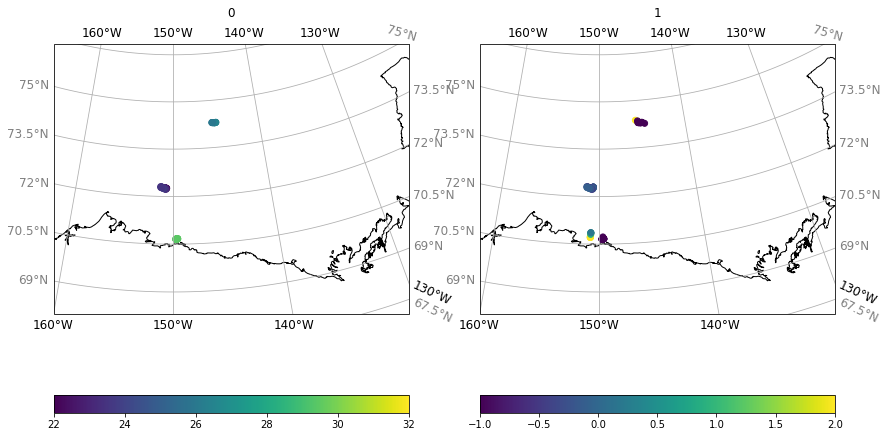

In [168]:
datadir = '/Users/kdrushka/data/sassie/insitu/data/'
files = glob.glob(datadir + '*csv')
# files = files[0]
# print(files)
# files=files[0]




# set up map 
# domain
blonmin = -165
blonmax = -120
blatmin = 68
blatmax = 78


blonmin = -160
blonmax = -130
blatmin = 68
blatmax = 76



lonmapmin = blonmin
lonmapmax = blonmax
latmapmin = blatmin
latmapmax = blatmax
lon0 = -150

nrows=1
ncols=2
map_proj = ccrs.NorthPolarStereo(central_longitude=lon0)
fig, axs = plt.subplots(nrows,ncols, subplot_kw=dict(projection=map_proj), figsize=[14,10])

crs = ccrs.PlateCarree()
fig.subplots_adjust(hspace=0.3)
for j in [0,1]:
    ax = axs[j]
    ax.plot(1,j,'o')
    ax.set_title(j)    
    ax.set_extent([lonmapmin, lonmapmax, latmapmin, latmapmax], crs=cartopy.crs.PlateCarree()) 
    ax.coastlines()
    gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
    gl.xformatter = LONGITUDE_FORMATTER
    gl.xlabel_style = {'size': 12, 'color': 'k','rotation':0}
    gl.yformatter = LATITUDE_FORMATTER
    gl.ylabel_style = {'size': 12, 'color': 'gray','rotation':0}

    
    
for file in files:
    print(file)
    df = pd.read_csv(file)
    # get rid of data out of the domain
    df = df[df.Lat > blatmin]
    df = df[df.Lat < blatmax]
    df = df[df.Lon > blonmin]
    df = df[df.Lon < blonmax]
    # df = df[df.Date > "2022-01-01"]
    

    # SSS
    
    psss = axs[0].scatter(df['Lon'], df['Lat'], c=df['Salinity'],
              transform=ccrs.PlateCarree(),
                   vmin=22, vmax=32)
    
    
    # 
    psst = axs[1].scatter(df['Lon'], df['Lat'], c=df['Temperature'],
              transform=ccrs.PlateCarree(),
                   vmin=-1, vmax=2)
    
    
    
    # pp = ax.scatter(df['Lon'], df['Lat'], c=df['Temperature'],
    #           transform=ccrs.PlateCarree())
hsss=plt.colorbar(psss, orientation='horizontal', ax=axs[0])
hsst=plt.colorbar(psst, orientation='horizontal', ax=axs[1])

# # filename = filename[0]
# # print(filename)


# # # df = pd.read_excel(filename)
      

In [26]:
files

'/Users/kdrushka/data/sassie/insitu/data/Swift17.csv'

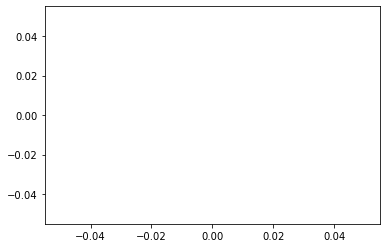

In [94]:
plt.scatter(df['Lon'], df['Lat'], c=df['Temperature'])

In [101]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


In [104]:
# %matplotlib qt
import PyQt5

ModuleNotFoundError: No module named 'PyQt5'